In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

In [0]:
import os
os.chdir("drive/My Drive/ColabData/HR analytics")
os.listdir()

# Importing Libraries 

In [0]:

import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score , accuracy_score
import matplotlib.pyplot as plt


# Wrangling Data

In [0]:
train=pd.read_csv('train_LZdllcl.csv')
test=pd.read_csv('test_2umaH9m.csv')

# Exploratory Data Analysis

In [5]:
print("Train Data Shape",train.shape)
print("Test Data Shape ",test.shape)

Train Data Shape (54808, 14)
Test Data Shape  (23490, 13)


In [0]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


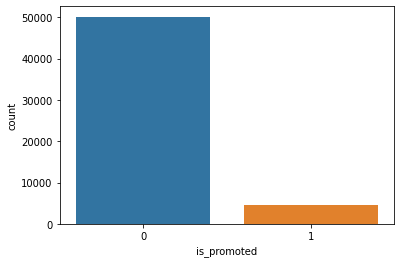

In [0]:
sns.countplot(x='is_promoted', data=train);

This shows there is an imbalance in the dataset.
1.People promoted are less
2.People not promoted are more
3.Imabalance in dataset






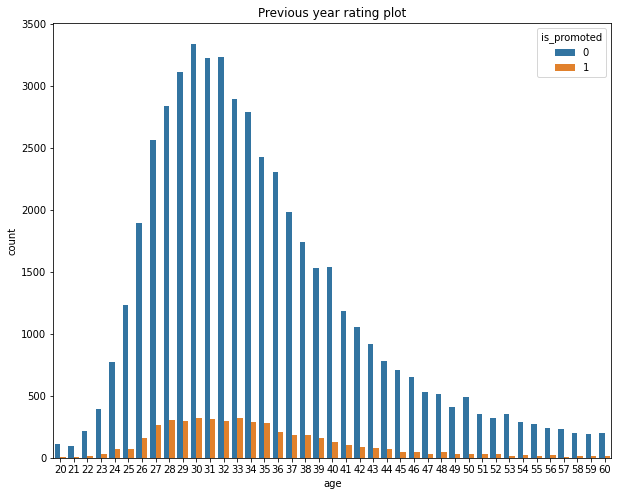

In [0]:
#sns.distplot(train['age'],  bins=30);
plt.figure(figsize=(10,8))
sns.countplot(data=train,x='age',hue='is_promoted').set_title('Previous year rating plot');

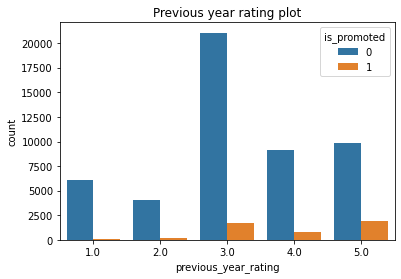

In [0]:
sns.countplot(data=train,x='previous_year_rating',hue='is_promoted').set_title('Previous year rating plot');

People with rating more than 3 are promoted more

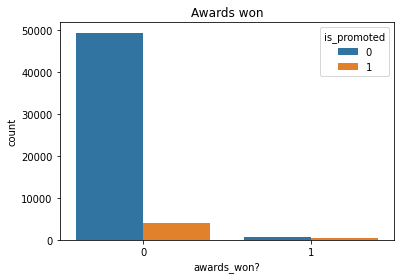

In [0]:
sns.countplot(data=train,x='awards_won?',hue='is_promoted').set_title('Awards won');

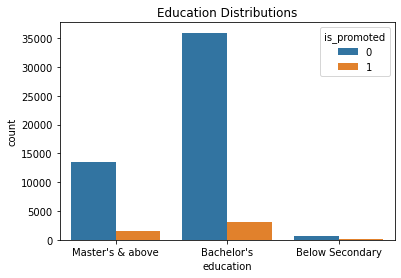

In [0]:
sns.countplot(data=train,x='education',hue='is_promoted').set_title('Education Distributions');

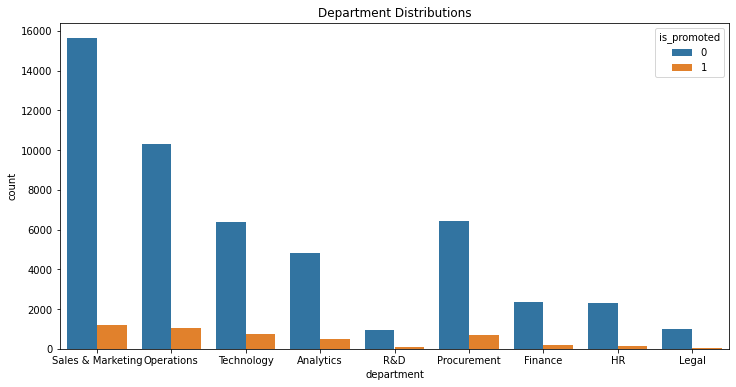

In [0]:
plt.figure(figsize=(12,6))
sns.countplot(data=train,x='department',hue='is_promoted').set_title('Department Distributions');

It can be a product based IT company as per the promotion chart

In [0]:
department=train.groupby(['department'])
department['is_promoted'].mean()

department
Analytics            0.095665
Finance              0.081230
HR                   0.056245
Legal                0.051011
Operations           0.090148
Procurement          0.096386
R&D                  0.069069
Sales & Marketing    0.072031
Technology           0.107593
Name: is_promoted, dtype: float64

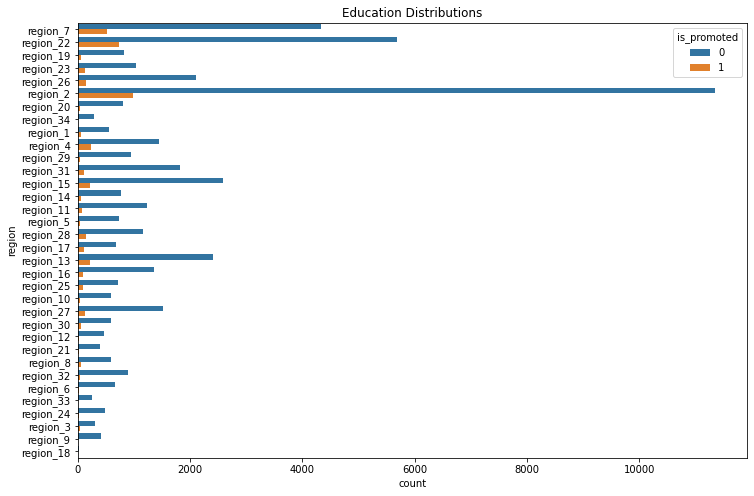

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(data=train,y='region',hue='is_promoted').set_title('Education Distributions');

Some regions have higher promotion rates, but it can also be that there are more number of employees in that area.

In [7]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


# Data Cleaning(Missing Data)

In [0]:
#Checking for missing data
train.isnull().sum()

Education and previous_year_rating have misssing values

In [0]:
#Checking for data types
train.dtypes

In [0]:
train['education'].unique()

In [0]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [0]:
#Filling with highest number of ouccurences data
train['education']=train['education'].transform(lambda x: x.fillna(x.mode()[0]))
test['education']=test['education'].transform(lambda x: x.fillna(x.mode()[0]))

In [0]:
train['education'].value_counts()

In [0]:
train['previous_year_rating'].unique()

In [0]:
train['previous_year_rating'].value_counts()


In [0]:
#Taking mean and rounding off
train['previous_year_rating']=train['previous_year_rating'].fillna(round(train['previous_year_rating'].mean()))
train['previous_year_rating'].value_counts()
test['previous_year_rating']=test['previous_year_rating'].fillna(round(test['previous_year_rating'].mean()))


# HeatMap for checking correlation

Function for heatmap

In [0]:
def generate_heat_map(train):
  plt.figure(figsize=(18,15))
  correlation_btw_all_train_features = train.corr()
  sns.heatmap(correlation_btw_all_train_features,annot=True,cmap=plt.cm.Reds)
  plt.show()

# Downsampling

As seen during EDA , there is an imbalanced dataset where People promoted are less than non-promoted.

In [0]:
train.groupby('is_promoted').count() 
#Inference class imbalane problem

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
is_promoted,,,,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


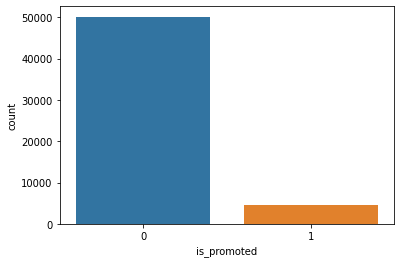

In [0]:
sns.countplot(x='is_promoted', data=train);

<BarContainer object of 2 artists>

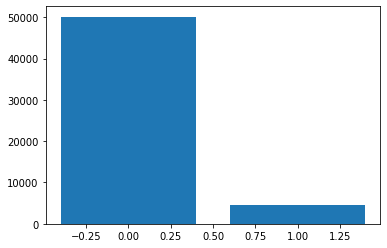

In [0]:
#Handling class imbalance
"""
promoted_df= train['is_promoted'] == 1

#Randomly select 492 observations from the non-fraud (majority class)
non_promoted_df= train['is_promoted'] == 0

# Concatenate both dataframes again
normalized_df = pd.concat([promoted_df, non_promoted_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sb.countplot( train['is_promoted'],data=normalized_df)
plt.title('Balanced Classes')
plt.show()
"""


In [0]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [0]:
train.is_promoted

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [0]:
#Downsampling
promoted_df= train[train.is_promoted == 1]
non_promoted_df= train[train.is_promoted == 0]
from sklearn.utils import resample
non_promoted_df_downsampled = resample(non_promoted_df, 
                                 replace=False,    # sample without replacement
                                 n_samples=4668,     # to match minority class
                                 random_state=42) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([non_promoted_df_downsampled, promoted_df])
 
# Display new class counts
df_downsampled.is_promoted.value_counts()

1    4668
0    4668
Name: is_promoted, dtype: int64

\
# Encoding

In [0]:
#ENCODING
def get_dummies(df):
  categorical_feature_mask = df.dtypes==object
  categorical_cols = df.columns[categorical_feature_mask].tolist()

  return pd.get_dummies(df, columns=categorical_cols) 
  

# Feature Engineering

In [0]:
#New features
train['total_performance']=train['KPIs_met >80%']+train['awards_won?']+train['previous_year_rating']
train['training_performance_weight']=train['avg_training_score']*train['no_of_trainings']

In [0]:
#heatmap 
generate_heat_map(train)

In [0]:
X_train=get_dummies(train)

In [44]:
#To see encoded variables
X_train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,total_performance,training_performance_weight,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,6.0,49,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,5.0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,0,50,0,3.0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,0,50,0,1.0,100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,0,73,0,3.0,73,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


In [0]:
generate_heat_map(X_train)

In [0]:
#Separating the dependent variable
y_train= X_train['is_promoted']
X_train= X_train.drop(['is_promoted'],axis=1)

In [0]:
#features_selected_corr=['avg_training_score','previous_year_rating','KPIs_met >80%','awards_won?','total_performance','training_performance_weight']

#X_train=X_train[features_selected_corr]

In [0]:
#Use in case of DS
#X_train= df_downsampled.drop(['region','employee_id'],axis=1) #because region not req
#X_train= train.drop(['employee_id'],axis=1)
#X_test= test.drop(['employee_id'],axis=1) 


#Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train_,X_valid,y_train_,y_valid=train_test_split(X_train,y_train, test_size=0.2)

# Models

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [0]:
def print_score_validation(regressor):
  predict_train = regressor.predict(X_train)
  print('accuracy_score on train dataset : ', accuracy_score(y_train,predict_train))
  y_pred_lr=regressor.predict(X_valid)
  print('accuracy_score on test dataset : ', accuracy_score(y_valid,y_pred_lr))  
  print('F1 score',f1_score(y_valid, y_pred_lr))


In [0]:
regressor_lr=LogisticRegression()
regressor_lr.fit(X_train, y_train)
#y_pred_lr=regressor_lr.predict(X_test)

In [0]:
print_score_validation(regressor_lr)

In [0]:

model_rf = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               max_features = 'sqrt',
                               verbose = 1)

# Fit on training data
model_rf.fit(X_train_, y_train_)


In [66]:
print_score_validation(model_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy_score on train dataset :  1.0
accuracy_score on test dataset :  1.0
F1 score 1.0


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [0]:
sorted(zip(model_rf.feature_importances_,X_train),reverse=True)

In [0]:
# features_selected=['avg_training_score','age','length_of_service','previous_year_rating','KPIs_met >80%','awards_won?','no_of_trainings','department_Sales & Marketing','department_Operations','recruitment_channel_other']
# X_train= X_train[features_selected]
# X_test= X_test[features_selected]


In [0]:
# LGB
import lightgbm as lgb
num_round=50
train_data=lgb.Dataset(X_train,label=y_train)
param = {'num_leaves':150, 'objective':'binary','max_depth':9,'learning_rate':.04,'max_bin':200, 'n_estimators': 390 ,'reg_alpha': 0.4 }
param['metric'] = ['auc', 'binary_logloss','f1_score']
lgbm=lgb.train(param,train_data,num_round)


"""
lgboosting = lgb.LGBMClassifier(objective='binary')
# Fitting LightGBM model
lgboosting.fit( X_train_, y_train_, eval_set=[(X_valid, y_valid)], eval_metric='f1_score', early_stopping_rounds=150)

def evalerror(preds, dtrain):
  labels = dtrain.get_label()
  #preds = preds.reshape(-1, 5)
  #preds = preds.argmax(axis = 1)
  f_score = f1_score(preds, labels, average = 'weighted')
  return 'f1_score', f_score, True

dtrain = lgb.Dataset(train_, label= train_Y, free_raw_data = False)
dvalid = lgb.Dataset(valid_X, label= valid_Y, free_raw_data = False,
reference= dtrain)
"""


'''
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)
'''

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


"\nd_train = lgb.Dataset(x_train, label=y_train)\nparams = {}\nparams['learning_rate'] = 0.003\nparams['boosting_type'] = 'gbdt'\nparams['objective'] = 'binary'\nparams['metric'] = 'binary_logloss'\nparams['sub_feature'] = 0.5\nparams['num_leaves'] = 10\nparams['min_data'] = 50\nparams['max_depth'] = 10\nclf = lgb.train(params, d_train, 100)\n"

In [0]:
#For X_TEST
y_pred_lgb=lgbm.predict(X_test)
print(y_pred_lgb.shape)
y_pred_lgb[y_pred_lgb >=0.5] = 1
y_pred_lgb[y_pred_lgb<0.5] = 0
#predict_train_lgb = model_rf.predict(X_train)
#print('accuracy_score on train dataset : ', accuracy_score(y_train,predict_train_lgb))

#print('accuracy_score on test dataset : ', accuracy_score(y_train,y_pred_lgb))

#print('F1 score',f1_score(y_valid, y_pred_lgb))

(23490,)


In [0]:
# FOR VALIDATION TESTING
#predict_train_lgb[predict_train_lgb >=0.5] = 1
#predict_train_lgb[predict_train_lgb<0.5] = 0
#predict_train_lgb = lgbm.predict(X_train_)
#print('accuracy_score on train dataset : ', accuracy_score(y_train_,predict_train_lgb))


y_pred_lgb=lgbm.predict(X_valid)
y_pred_lgb[y_pred_lgb >=0.5] = 1
y_pred_lgb[y_pred_lgb<0.5] = 0

print('accuracy_score on test dataset : ', accuracy_score(y_valid,y_pred_lgb))

print('F1 score',f1_score(y_valid, y_pred_lgb))


accuracy_score on test dataset :  0.9271118409049444
F1 score 0.2742960944595822


In [0]:
"""
1. param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
2.param = {'num_leaves':150, 'objective':'binary','max_depth':9,'learning_rate':.05,'max_bin':200}
3.param = {'num_leaves':100, 'objective':'binary','max_depth':9,'learning_rate':.05,'max_bin':200}
F1 score 0.5177025963808025
4.param = {'num_leaves':150, 'objective':'binary','max_depth':9,'learning_rate':.08,'max_bin':200}
F1 score 0.5221445221445221
5.param = {'num_leaves':150, 'objective':'binary','max_depth':9,'learning_rate':.04,'max_bin':200, 'n_estimators': 1000 ,
F1 score 0.5253118121790168
6.param = {'num_leaves':150, 'objective':'binary','max_depth':9,'learning_rate':.04,'max_bin':200, 'n_estimators': 1000 ,'reg_alpha': 0.4 }
F1 score 0.5279187817258882
7.'n_estimators': 1100
F1 score 0.5293691080493111
8.'n_estimators': 390 
F1 score 0.539156626506024
"""

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=9,min_samples_split=2,
                                random_state=42)
dtc.fit(X_train_, y_train_)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [68]:
print_score_validation(dtc)

accuracy_score on train dataset :  1.0
accuracy_score on test dataset :  1.0
F1 score 1.0


In [0]:
from sklearn.svm import SVC
svc_model=SVC(C=1.0, kernel='rbf', degree=3)
svc_model.fit(X_train_, y_train_)
svc_model= dtc.predict(X_train_)


accuracy_score on train dataset :  0.9290471194635771
accuracy_score on test dataset :  0.9278416347381865
F1 score 0.2736455463728191


In [0]:
print_score_validation(svc_model)

In [0]:
y_pred_lgb=y_pred_lgb.astype(int)
y_pred_lgb.dtype

dtype('int64')

In [0]:
sub_file = pd.DataFrame(columns=['employee_id', 'is_promoted'])
sub_file['employee_id'] = test['employee_id']
sub_file['is_promoted'] = y_pred_lgb
sub_file.to_csv(f'submissions_HR_analytics_RF_5.csv', index=False)
from google.colab import files
files.download('submissions_HR_analytics_RF_5.csv') 